In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u
from astropy.constants import c, h
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams.update({'font.size': 20})

import convenience_functions as conv

## Construct bandpass of the instrument

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


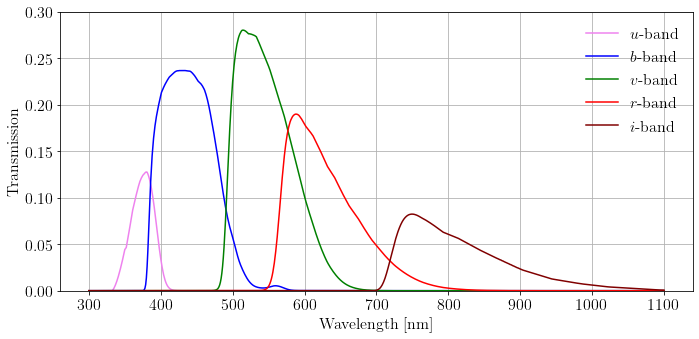

In [2]:
# Telescope
telescope = pd.read_csv("data/instrument/telescope/telescope.csv")
telescope_wave = telescope['wavelength'].values
telescope_trans = telescope['transmission'].values

# Camera
camera = pd.read_csv("data/instrument/camera/camera.csv")
camera_wave = camera['wavelength'].values
camera_trans = camera['transmission'].values

# Filters
uv = pd.read_csv("data/instrument/filters/u.csv")
u_wave = uv['wavelength'].values
u_trans = uv['transmission'].values

b = pd.read_csv("data/instrument/filters/b.csv")
b_wave = b['wavelength'].values
b_trans = b['transmission'].values

v = pd.read_csv("data/instrument/filters/v.csv")
v_wave = v['wavelength'].values
v_trans = v['transmission'].values

r = pd.read_csv("data/instrument/filters/r.csv")
r_wave = r['wavelength'].values
r_trans = r['transmission'].values

i = pd.read_csv("data/instrument/filters/i.csv")
i_wave = i['wavelength'].values
i_trans = i['transmission'].values

# Overall bandpasses
u_tot = u_trans * camera_trans * telescope_trans
b_tot = b_trans * camera_trans * telescope_trans
v_tot = v_trans * camera_trans * telescope_trans
r_tot = r_trans * camera_trans * telescope_trans
i_tot = i_trans * camera_trans * telescope_trans

plt.figure(figsize=(10, 5))
plt.plot(u_wave, u_tot, label="$u$-band", color='violet')
plt.plot(b_wave, b_tot, label="$b$-band", color='blue')
plt.plot(v_wave, v_tot, label="$v$-band", color='green')
plt.plot(r_wave, r_tot, label="$r$-band", color='red')
plt.plot(i_wave, i_tot, label="$i$-band", color='maroon')
plt.grid()
plt.ylabel("Transmission")
plt.xlabel("Wavelength [nm]")
plt.legend(frameon=False)
plt.ylim(0, 0.3)

plt.tight_layout()
#plt.savefig("plots/bandpass.eps", format='eps', dpi=500)
plt.show()

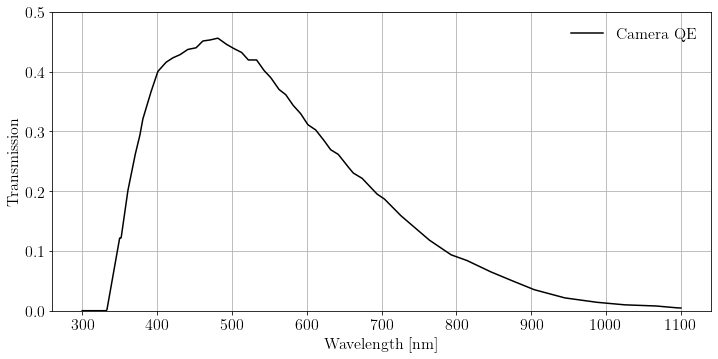

In [3]:
plt.figure(figsize=(10,5))
plt.plot(camera_wave, camera_trans, label="Camera QE", color="k")
plt.grid()
plt.legend(frameon=False)
plt.ylim(0, 0.5)
plt.tight_layout()
plt.ylabel("Transmission")
plt.xlabel("Wavelength [nm]")
#plt.savefig("plots/camera_qe.eps", format='eps', dpi=500)
plt.show()

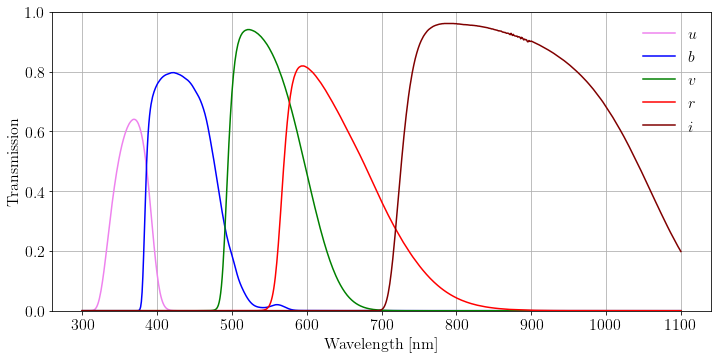

In [4]:
plt.figure(figsize=(10,5))
plt.plot(u_wave, u_trans, label="$u$", color="violet")
plt.plot(b_wave, b_trans, label="$b$", color="blue")
plt.plot(v_wave, v_trans, label="$v$", color="green")
plt.plot(r_wave, r_trans, label="$r$", color="red")
plt.plot(i_wave, i_trans, label="$i$", color="maroon")

plt.grid()
plt.legend(frameon=False)
plt.ylim(0, 1)
plt.tight_layout()
plt.ylabel("Transmission")
plt.xlabel("Wavelength [nm]")
#plt.savefig("plots/filters.eps", format='eps', dpi=500)
plt.show()

# Instrument parameters
- Telescope diameter: 0.5 meter
- Camera dark current: 0.1 [e/s/pixel]
- Camera read noise: 10 [e/pixel]
- Camera full well capacity: 50000
- Camera pixel size: 4 micron x 4 micron
- Camera digitization resolution: 16 bits
- Camera bias level: 200 ADU

In [ ]:
# blank_image = np.zeros([1000, 1000])

# im_bias = conv.get_bias_level(image=blank_image,
#                      bias_value=200,
#                      num_columns=6)

# im_read_noise = conv.get_read_noise(image=blank_image,
#                                read_noise_std=10,
#                                gain=4.88)
# im_dark_current = conv.get_dark_current(image=blank_image,
#                            dark_current=0.1,
#                            gain=4.88,
#                            exposure_time=100,
#                            hot_pixels=False)
# im_sky_noise = conv.get_sky_bkg(image=blank_image,
#                              sky_noise_electrons=0.5,
#                              gain=4.88,
#                              exposure_time=100)

# im_flat = conv.get_flat(image=blank_image,
#                   percent_variations=5)

# # Flat field correct the sky noise image
# im_sky_noise_corr = np.multiply(im_sky_noise, im_flat)

# noise_combined = im_read_noise+im_dark_current+im_sky_noise_corr+im_bias

# conv.plot_image(image=noise_combined,
#            title='Total noise image')

In [ ]:
# from astropy.modeling.models import Gaussian2D

# # b band
# lam = 760 * u.nm # CHANGE THIS
# telescope_diam = 0.5 * u.m
# FL = 5500 * u.mm
# f = (FL.to(u.m)/telescope_diam)
# pixel_size = 4 * u.micrometer
# plate_scale = ((206265 * pixel_size.value) / (1000 * FL.value)) * (u.arcsec/u.pixel)
# fwc = 50000

# FWHM = (((1.22 * lam.to(u.m)) / telescope_diam)*(u.rad)).to(u.arcsec)
# FWHM_pixel = FWHM.value / plate_scale.value
# sigma = FWHM_pixel / 2.35482
# gain = fwc / (2**12 - 1)

# # Create image
# blank_image = np.zeros([1000, 1000])

# dark_current = 0.1
# read_noise_std = 10
# exposure_time = 100
# sky_noise_adu_crate = 2.08 # CHANGE THIS
# sky_noise_el_crate = sky_noise_adu_crate * gain
# bias_value = 200

# im_read_noise = conv.get_read_noise(image=blank_image,
#                                     read_noise_std=read_noise_std,
#                                     gain=gain)
# im_dark_current = conv.get_dark_current(image=blank_image,
#                            dark_current=dark_current,
#                            gain=gain,
#                            exposure_time=exposure_time,
#                            hot_pixels=False)
# im_sky_noise = conv.get_sky_bkg(image=blank_image,
#                              sky_noise_electrons=sky_noise_el_crate,
#                              gain=gain,
#                              exposure_time=exposure_time)
# im_bias = conv.get_bias_level(image=blank_image,
#                               bias_value=bias_value,
#                               num_columns=6)

# noise_combined = im_read_noise+im_dark_current+im_sky_noise+im_bias

# x_stddev = sigma
# y_stddev = sigma

# amplitude = counts / (2*np.pi*x_stddev*y_stddev)
# y, x = np.mgrid[0:10, 0:10]
# guassian = Gaussian2D(amplitude=amplitude,
#                       x_mean=5,
#                       y_mean=5,
#                       x_stddev=x_stddev,
#                       y_stddev=y_stddev)

# star = guassian(x,y)

# noise_combined[500:510, 500:510]+= star

# fits.writeto('i.fits', noise_combined, overwrite=True) # CHANGE
# conv.plot_image(noise_combined)

In [ ]:
# from astropy.nddata import Cutout2D
# position = (505, 505)
# size = (5, 5)
# cutout = Cutout2D(noise_combined, position, size)

In [ ]:
# conv.plot_image(cutout.data, default_ticks=True)
# print(np.sum(cutout.data))

In [ ]:
# fnu = fnu_ref
# wave = np.asarray(u_wave)
# freq = conv.wave_to_freq(wavelength=wave)
# mab = conv.fnu_to_abmag(fnu)
# tel_area = (np.pi * (telescope_diam/2)**2).to(u.cm**2)

# flambda = conv.flambda_from_fnu(bandpass=r_tot,
#                                fnu=fnu,
#                                frequencies=freq)
# crate = conv.countrate_from_flambda(flambda=flambda,
#                                     bandpass=r_tot,
#                                     wavelengths=u_wave,
#                                     illumination_area=tel_area.value)
# alpha = crate/fnu

# print(mab)
# print(alpha)
# print(crate * 100)

In [ ]:
# alpha = 4.34e27
# mab_bkg = 19.7
# fnu_bkg = conv.abmag_to_fnu(mab_bkg)
# crate = alpha * fnu_bkg
# print(crate)

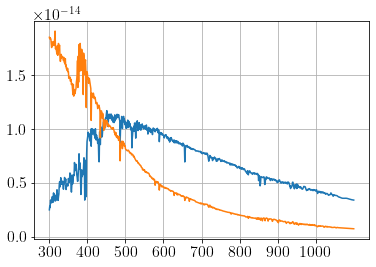

In [6]:
g2v = pd.read_csv('g2v_spectrum.csv')
b5i = pd.read_csv('b5i_spectrum.csv')

plt.plot(g2v['wavelengths'].values, g2v['flambda'].values)
plt.plot(b5i['wavelengths'].values, b5i['flambda'].values)

plt.xticks(np.arange(300, 1100, 100))
plt.grid()
plt.show()

In [7]:
def mean_flambda_from_flambda(flambda,
                              bandpass,
                              wavelengths):
    flambda *= u.erg/u.s/u.cm**2/u.nm
    
    wavelengths *= u.nm 
    
    del_lam = ((np.max(wavelengths) - np.min(wavelengths)) 
             / len(wavelengths))

    numerator = np.trapz(y=bandpass*flambda*wavelengths,
                         x=wavelengths,
                         dx=del_lam)
    denominator = np.trapz(y=wavelengths*bandpass,
                         x=wavelengths,
                         dx=del_lam)

    flambda_mean = (numerator/denominator).to(u.erg/u.s/u.cm**2/u.nm).value
    return flambda_mean

def pivot_wavelength(bandpass,
                     wavelengths): 
    wavelengths *= u.nm 
    integrand_num = bandpass * wavelengths
    integrand_den = bandpass / wavelengths

    del_lam =((np.max(wavelengths) - np.min(wavelengths)) 
               / len(wavelengths))

    numerator = (np.trapz(y=integrand_num, 
                          x=wavelengths,
                          dx=del_lam))

    denominator = (np.trapz(y=integrand_den, 
                            x=wavelengths,
                            dx=del_lam))

    pivot_wave = np.sqrt(numerator/denominator)

    return pivot_wave.to(u.nm).value

def mean_fnu_from_flam_pivot(bandpass,
                            wavelengths,
                            flambda):
    
    mean_flambda = mean_flambda_from_flambda(flambda=flambda,
                                             bandpass=bandpass,
                                             wavelengths=wavelengths)
    mean_flambda *= (u.erg/u.s/u.cm**2/u.nm)
    
    piv_wave = pivot_wavelength(bandpass=bandpass,
                               wavelengths=wavelengths)
    piv_wave *= u.nm
    
    mean_fnu = (piv_wave**2 / c) * mean_flambda
    return mean_fnu.to(u.erg/u.s/u.cm**2/u.Hz).value

In [ ]:
bandpass = i_tot
flambda = b5i['flambda'].values
wavelengths = u_wave

mean_fu = mean_fnu_from_flam_pivot(bandpass=bandpass,
                         flambda=flambda,
                         wavelengths=wavelengths)
ab_mag = conv.fnu_to_abmag(mean_fu)

telescope_diam = 0.5 * u.m
illumination_area = (np.pi * (telescope_diam/2)**2).to(u.cm**2)

crate = conv.countrate_from_flambda(flambda=flambda,
                                    bandpass=bandpass,
                                    wavelengths=wavelengths,
                                    illumination_area=illumination_area.value)

print(crate * 100)
print(ab_mag)

17.31927800593862 5.605730278361435e+27


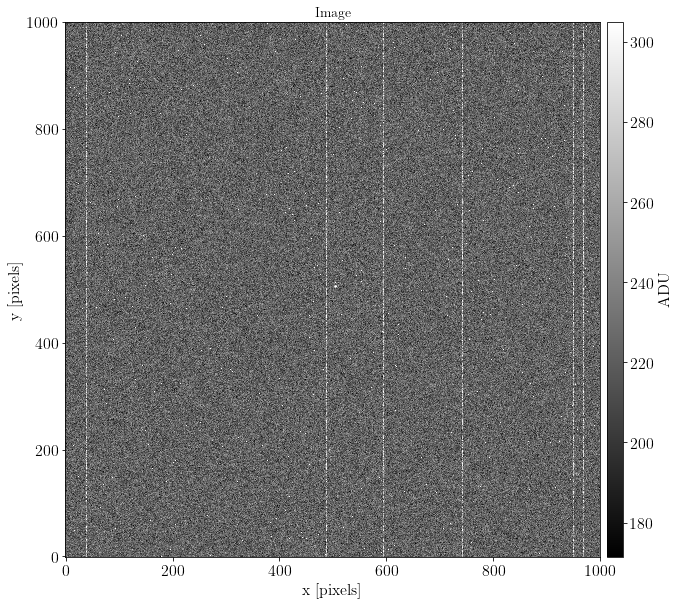

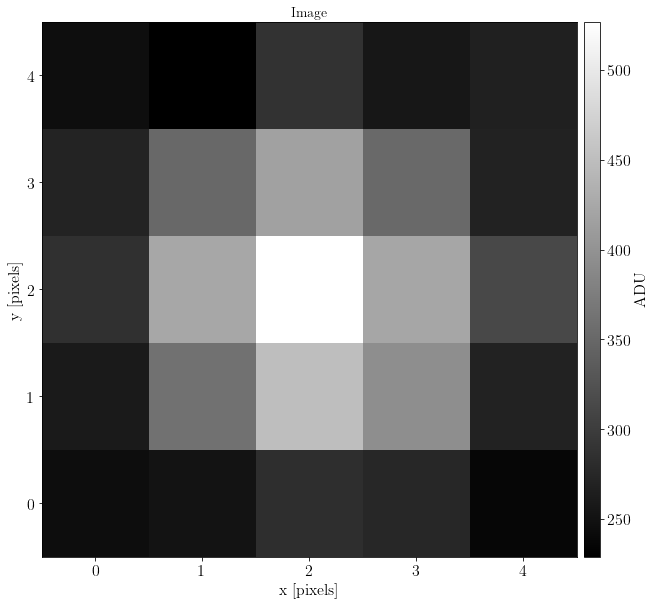

In [104]:
from astropy.modeling.models import Gaussian2D

bandpass = i_tot
wavelengths = u_wave
source = 'b5i'
exposure_time = 100
sky_abmag = 23.27
sky_fnu = conv.abmag_to_fnu(sky_abmag)

if source == 'g2v':
    flambda = g2v['flambda'].values
elif source == 'b5i':
    flambda = b5i['flambda'].values

lam = pivot_wavelength(bandpass=bandpass, wavelengths=u_wave)*u.nm
telescope_diam = 0.5 * u.m
illumination_area = (np.pi * (telescope_diam/2)**2).to(u.cm**2)
FL = 5500 * u.mm

pixel_size = 4 * u.micrometer
plate_scale = ((206265 * pixel_size.value) / (1000 * FL.value)) * (u.arcsec/u.pixel)

FWHM = (((1.22 * lam.to(u.m)) / telescope_diam)*(u.rad)).to(u.arcsec)
FWHM_pixel = FWHM.value / plate_scale.value
sigma = FWHM_pixel / 2.35482

fwc = 50000
gain = fwc / (2**16 - 1)

# Find source count rate
crate = conv.countrate_from_flambda(flambda=flambda,
                                    bandpass=bandpass,
                                    wavelengths=wavelengths,
                                    illumination_area=illumination_area.value)

counts = crate * exposure_time / gain

mean_fu = mean_fnu_from_flam_pivot(bandpass=bandpass,
                                   flambda=flambda,
                                   wavelengths=wavelengths)

ab_mag = conv.fnu_to_abmag(mean_fu)

alpha = (counts/exposure_time) / mean_fu

sky_crate_adu = alpha * sky_fnu
sky_crate_el = sky_crate_adu * gain

piv_freq = (c / lam).to(u.Hz)

print(ab_mag, alpha)
# Create noise image
blank_image = np.zeros([1000, 1000])

dark_current = 0.1
read_noise_std = 10
bias_value = 200

im_read_noise = conv.get_read_noise(image=blank_image,
                                    read_noise_std=read_noise_std,
                                    gain=gain)

im_dark_current = conv.get_dark_current(image=blank_image,
                           dark_current=dark_current,
                           gain=gain,
                           exposure_time=exposure_time,
                           hot_pixels=True,
                           hot_pixels_percentage=0.1)

im_sky_noise = conv.get_sky_bkg(image=blank_image,
                             sky_noise_electrons=sky_crate_el,
                             gain=gain,
                             exposure_time=exposure_time)

im_flat = conv.get_flat(image=blank_image,
                  percent_variations=5)

# Flat field correct the sky noise image
im_sky_noise_corr = np.multiply(im_sky_noise, im_flat)

im_bias = conv.get_bias_level(image=blank_image,
                              bias_value=bias_value,
                              num_columns=6)

noise_combined = im_read_noise+im_dark_current+im_sky_noise_corr+im_bias

dark_save = im_bias + im_dark_current

x_stddev = sigma
y_stddev = sigma

amplitude = counts / (2*np.pi*x_stddev*y_stddev)
y, x = np.mgrid[0:10, 0:10]
guassian = Gaussian2D(amplitude=amplitude,
                      x_mean=5,
                      y_mean=5,
                      x_stddev=x_stddev,
                      y_stddev=y_stddev)

star = guassian(x,y)

noise_combined[500:510, 500:510]+= star

fits.writeto('data/star_images/b5i/i.fits', noise_combined, overwrite=True) # CHANGE
conv.plot_image(noise_combined)

from astropy.nddata import Cutout2D
position = (505, 505)
size = (5, 5)
cutout = Cutout2D(noise_combined, position, size)

conv.plot_image(cutout.data, default_ticks=True,
               interval_type='percentile')

In [93]:
abmag_arcsec = 19.15

fnu_arcsec = conv.abmag_to_fnu(abmag_arcsec) * (u.erg/u.s/u.cm**2/u.Hz/u.arcsec**2)
fnu_pix = fnu_arcsec.value * plate_scale.value**2
abmag_pix = conv.fnu_to_abmag(fnu_pix)
abmag_pix

23.269385785197905